In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Used for Downloading MNIST
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
mnist = fetch_mldata('MNIST original', data_home='~/Desktop/python-test/Scikit')

/home/aayush/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/aayush/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

In [10]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [11]:
train_img.shape

(60000, 784)

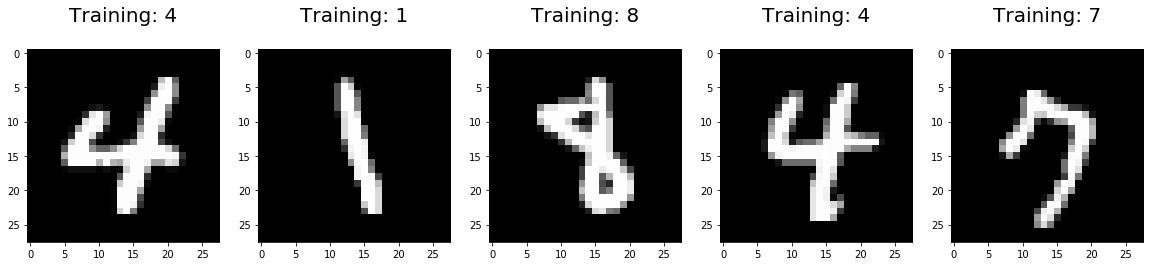

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [15]:
logisticRegr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
logisticRegr.fit(train_img, train_lbl)

/home/aayush/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/aayush/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aayush/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aayush/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aayush/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. I

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

Text(0.5, 1.0, 'Training: 1\n')

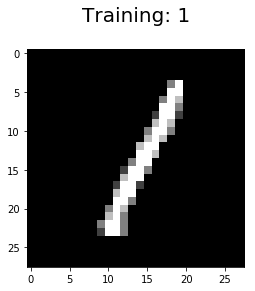

In [21]:
plt.imshow(np.reshape(test_img[0], (28,28)), cmap=plt.cm.gray)
plt.title('Training: %i\n' % test_lbl[0], fontsize = 20)

In [22]:
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [23]:
score = logisticRegr.score(test_img, test_lbl)  #accuracy
print(score)

0.9134


In [24]:
predictions = logisticRegr.predict(test_img)

In [25]:
cm = metrics.confusion_matrix(test_lbl, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

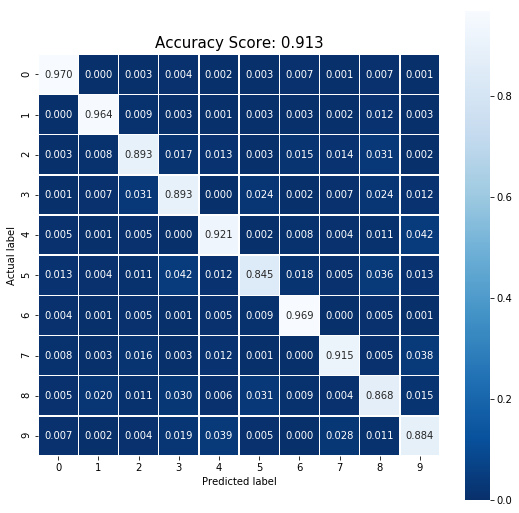

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

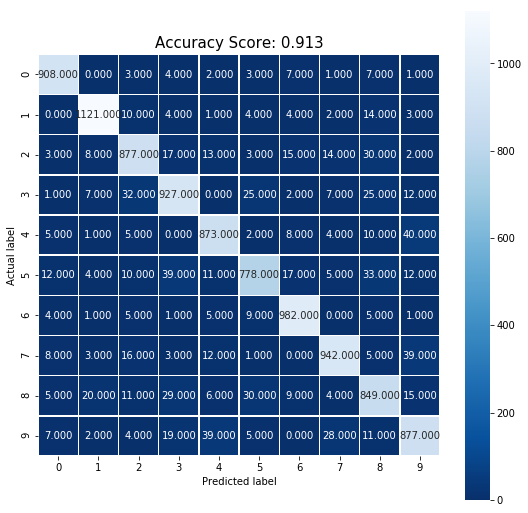

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);